In [60]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import patsy

In [2]:
df_capes = pd.read_csv("CapesCleaned (1).csv")
df_income = pd.read_csv("bins.csv")
df_capes

,Unnamed: 0,Instructor,Department,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled
0,0,"Ben-Yosef, Erez",Anthropology,100.000000,3.6400,1.0,19.0
1,1,"D'Alpoim Guedes, Jade A",Anthropology,100.000000,3.7500,1.0,39.0
2,2,"Marchetto, Maria Carolina",Anthropology,100.000000,3.9100,1.0,25.0
3,3,"Non, Amy L",Anthropology,90.966667,3.2800,3.0,91.0
4,4,"Lew, Caroline Horton",Anthropology,88.100000,3.6850,2.0,72.0
...,...,...,...,...,...,...,...
1534,1534,"Pafunda, Danielle",Literature,98.075000,3.8075,4.0,139.0
1535,1535,"Johnson, Sara E.",Literature,97.200000,3.6900,1.0,45.0
1536,1536,"Morse, Ainsley",Literature,100.000000,3.7000,2.0,30.0
1537,1537,"Kokotovic, Milos",Literature,100.000000,3.7550,2.0,43.0


In [3]:
def last_name(string):
    end = string.find(',')
    return string[0:end].upper()
def first_name(string):
    start = string.find(',')
    name = string[start+2:].upper()
    space = name.find(' ')
    if (space != -1):
        return name[:space+2]
    return name
def uppercase(string):
    return string.upper()

In [4]:
df_capes['Last Name'] = df_capes['Instructor'].apply(last_name)
df_capes['First Name'] = df_capes['Instructor'].apply(first_name)
df_capes['Instructor'] = df_capes['Last Name'] + ', ' + df_capes['First Name']
df_capes

,Unnamed: 0,Instructor,Department,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled,Last Name,First Name
0,0,"BEN-YOSEF, EREZ",Anthropology,100.000000,3.6400,1.0,19.0,BEN-YOSEF,EREZ
1,1,"D'ALPOIM GUEDES, JADE A",Anthropology,100.000000,3.7500,1.0,39.0,D'ALPOIM GUEDES,JADE A
2,2,"MARCHETTO, MARIA C",Anthropology,100.000000,3.9100,1.0,25.0,MARCHETTO,MARIA C
3,3,"NON, AMY L",Anthropology,90.966667,3.2800,3.0,91.0,NON,AMY L
4,4,"LEW, CAROLINE H",Anthropology,88.100000,3.6850,2.0,72.0,LEW,CAROLINE H
...,...,...,...,...,...,...,...,...,...
1534,1534,"PAFUNDA, DANIELLE",Literature,98.075000,3.8075,4.0,139.0,PAFUNDA,DANIELLE
1535,1535,"JOHNSON, SARA E",Literature,97.200000,3.6900,1.0,45.0,JOHNSON,SARA E
1536,1536,"MORSE, AINSLEY",Literature,100.000000,3.7000,2.0,30.0,MORSE,AINSLEY
1537,1537,"KOKOTOVIC, MILOS",Literature,100.000000,3.7550,2.0,43.0,KOKOTOVIC,MILOS


In [5]:
def first_name_1(string):
    name = string.upper()
    space = name.find(' ')
    if (space != -1):
        return name[:space+2]
    return name
df_income['First Name'] = df_income['First Name'].apply(first_name_1)
df_income['Instructor'] = df_income['Last Name'] + ', ' + df_income['First Name']
df_income

,Unnamed: 0,Last Name,First Name,Title,Gross Pay,quantile_pay,pay,Instructor
0,0,ABI SAMRA,NICHOLAS C,LECTURER - ACADEMIC YEAR,55491.0,"(48220.69, 57669.828]",48220.0,"ABI SAMRA, NICHOLAS C"
1,1,ACCOMANDO,ALYSSA W,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,8900.0,"(975.0, 10424.138]",976.0,"ACCOMANDO, ALYSSA W"
2,2,ADAMS,DAVE K,LECTURER IN SUMMER SESSION,5600.0,"(975.0, 10424.138]",976.0,"ADAMS, DAVE K"
3,3,AGUILA,CHRISTINA O,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,5874.0,"(975.0, 10424.138]",976.0,"AGUILA, CHRISTINA O"
4,4,AJO,FRANCES B,LECTURER - ACADEMIC YEAR,54985.0,"(48220.69, 57669.828]",48220.0,"AJO, FRANCES B"
...,...,...,...,...,...,...,...,...
571,571,ZAIDI,SYED A,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,3044.0,"(975.0, 10424.138]",976.0,"ZAIDI, SYED A"
572,572,ZAITSEV,ANNA L,LECTURER - ACADEMIC YEAR,31440.0,"(29322.414, 38771.552]",29322.0,"ZAITSEV, ANNA L"
573,573,ZAK,ALEXANDER P,LECTURER - ACADEMIC YEAR,53676.0,"(48220.69, 57669.828]",48220.0,"ZAK, ALEXANDER P"
574,574,ZARATE,SALVADOR E,LECTURER - ACADEMIC YEAR,31151.0,"(29322.414, 38771.552]",29322.0,"ZARATE, SALVADOR E"


In [6]:
df = df_income.merge(df_capes, on=['Instructor'])
df

,Unnamed: 0_x,Last Name_x,First Name_x,Title,Gross Pay,quantile_pay,pay,Instructor,Unnamed: 0_y,Department,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled,Last Name_y,First Name_y
0,0,ABI SAMRA,NICHOLAS C,LECTURER - ACADEMIC YEAR,55491.0,"(48220.69, 57669.828]",48220.0,"ABI SAMRA, NICHOLAS C",459,Electrical & Computer Eng.,95.120,3.80200,5.0,196.0,ABI SAMRA,NICHOLAS C
1,1,ACCOMANDO,ALYSSA W,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,8900.0,"(975.0, 10424.138]",976.0,"ACCOMANDO, ALYSSA W",1157,Psychology,97.000,3.25000,1.0,52.0,ACCOMANDO,ALYSSA W
2,2,ADAMS,DAVE K,LECTURER IN SUMMER SESSION,5600.0,"(975.0, 10424.138]",976.0,"ADAMS, DAVE K",1234,Structural Engineering,100.000,3.33000,1.0,14.0,ADAMS,DAVE K
3,6,ALBIZATI,KIM F,LECTURER - ACADEMIC YEAR - CONTINUING,52200.0,"(48220.69, 57669.828]",48220.0,"ALBIZATI, KIM F",228,Chemistry,90.575,3.11500,4.0,1356.0,ALBIZATI,KIM F
4,8,ALLEN,GRANT W,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,20767.0,"(19873.276, 29322.414]",19873.0,"ALLEN, GRANT W",897,Mathematics,90.450,3.35000,2.0,491.0,ALLEN,GRANT W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,569,YOUNG,MARK T,LECTURER - ACADEMIC YEAR,55327.0,"(48220.69, 57669.828]",48220.0,"YOUNG, MARK T",1491,Warren College Writing Program,96.825,3.32375,8.0,146.0,YOUNG,MARK T
351,570,YOUNG,MARK,ASSOCIATE TEACHING PROFESSOR - ACADEMIC YEAR,41667.0,"(38771.552, 48220.69]",38771.0,"YOUNG, MARK",235,Chemistry,77.900,2.83000,1.0,228.0,YOUNG,MARK
352,572,ZAITSEV,ANNA L,LECTURER - ACADEMIC YEAR,31440.0,"(29322.414, 38771.552]",29322.0,"ZAITSEV, ANNA L",372,Computer Science,82.800,3.39500,2.0,242.0,ZAITSEV,ANNA L
353,574,ZARATE,SALVADOR E,LECTURER - ACADEMIC YEAR,31151.0,"(29322.414, 38771.552]",29322.0,"ZARATE, SALVADOR E",204,other,99.140,3.80000,5.0,121.0,ZARATE,SALVADOR E


In [7]:
df = df.drop(['Unnamed: 0_x', 'Last Name_x', 'First Name_x', 'quantile_pay', 'pay', 'Instructor', 'Unnamed: 0_y', 'Last Name_y', 'First Name_y'], axis=1)

In [8]:
df

,Title,Gross Pay,Department,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled
0,LECTURER - ACADEMIC YEAR,55491.0,Electrical & Computer Eng.,95.120,3.80200,5.0,196.0
1,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,8900.0,Psychology,97.000,3.25000,1.0,52.0
2,LECTURER IN SUMMER SESSION,5600.0,Structural Engineering,100.000,3.33000,1.0,14.0
3,LECTURER - ACADEMIC YEAR - CONTINUING,52200.0,Chemistry,90.575,3.11500,4.0,1356.0
4,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,20767.0,Mathematics,90.450,3.35000,2.0,491.0
...,...,...,...,...,...,...,...
350,LECTURER - ACADEMIC YEAR,55327.0,Warren College Writing Program,96.825,3.32375,8.0,146.0
351,ASSOCIATE TEACHING PROFESSOR - ACADEMIC YEAR,41667.0,Chemistry,77.900,2.83000,1.0,228.0
352,LECTURER - ACADEMIC YEAR,31440.0,Computer Science,82.800,3.39500,2.0,242.0
353,LECTURER - ACADEMIC YEAR,31151.0,other,99.140,3.80000,5.0,121.0


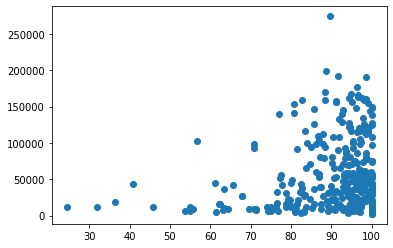

In [9]:
plt.scatter(df['Rcmnd Instr'],df['Gross Pay'])

<BarContainer object of 355 artists>

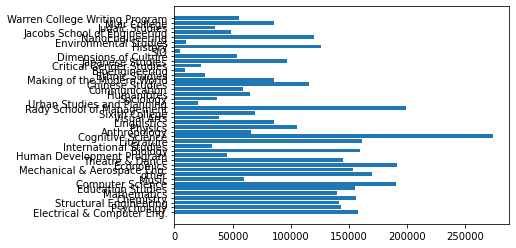

In [10]:
plt.barh(df['Department'], df['Gross Pay'])

In [11]:
by_dep = df.groupby(['Department']).mean()

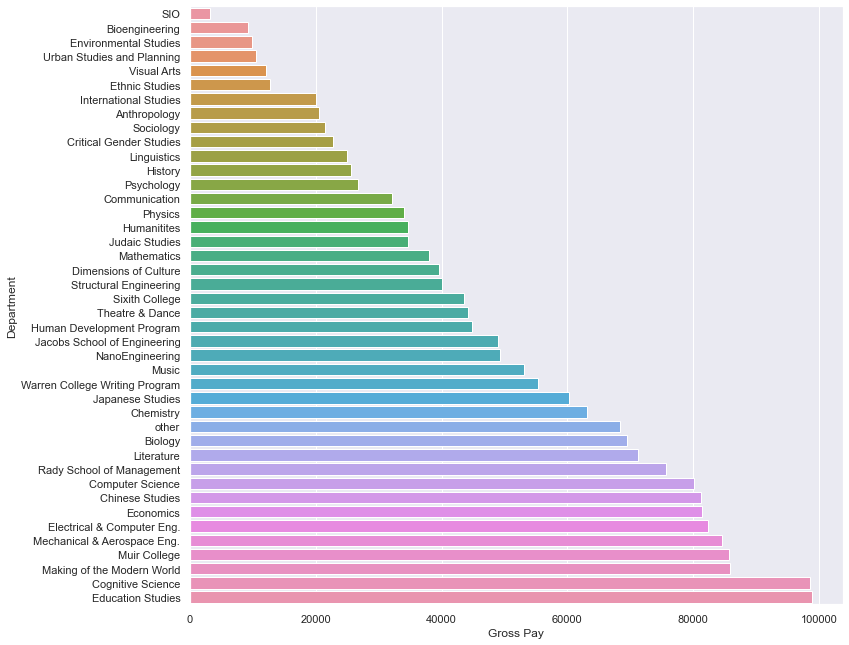

In [12]:
sns.set(rc={'figure.figsize':(11.7,11)})
sns.barplot(y=by_dep.index, x=by_dep['Gross Pay'], dodge=False, order=by_dep.sort_values('Gross Pay').index)

In [13]:
df['Pay per Student'] = df['Gross Pay'] / df['Enrolled']
df

,Title,Gross Pay,Department,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled,Pay per Student
0,LECTURER - ACADEMIC YEAR,55491.0,Electrical & Computer Eng.,95.120,3.80200,5.0,196.0,283.117347
1,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,8900.0,Psychology,97.000,3.25000,1.0,52.0,171.153846
2,LECTURER IN SUMMER SESSION,5600.0,Structural Engineering,100.000,3.33000,1.0,14.0,400.000000
3,LECTURER - ACADEMIC YEAR - CONTINUING,52200.0,Chemistry,90.575,3.11500,4.0,1356.0,38.495575
4,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,20767.0,Mathematics,90.450,3.35000,2.0,491.0,42.295316
...,...,...,...,...,...,...,...,...
350,LECTURER - ACADEMIC YEAR,55327.0,Warren College Writing Program,96.825,3.32375,8.0,146.0,378.952055
351,ASSOCIATE TEACHING PROFESSOR - ACADEMIC YEAR,41667.0,Chemistry,77.900,2.83000,1.0,228.0,182.750000
352,LECTURER - ACADEMIC YEAR,31440.0,Computer Science,82.800,3.39500,2.0,242.0,129.917355
353,LECTURER - ACADEMIC YEAR,31151.0,other,99.140,3.80000,5.0,121.0,257.446281


In [14]:
by_dep = df.groupby(['Department']).mean()
by_dep

,Gross Pay,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled,Pay per Student
Department,,,,,,
Anthropology,20455.600000,95.020000,3.577000,1.600000,56.800000,411.665562
Bioengineering,9162.000000,64.500000,3.230000,1.000000,105.000000,87.257143
Biology,69423.280000,91.312476,3.438838,3.920000,514.120000,320.567442
Chemistry,63126.583333,83.925208,3.127926,4.000000,740.666667,100.347494
Chinese Studies,81198.750000,95.453125,3.764687,7.500000,164.000000,495.972437
Cognitive Science,98519.142857,89.643105,3.451064,4.428571,650.857143,292.024343
Communication,32202.888889,93.776111,3.739833,3.222222,116.888889,351.536132
Computer Science,80192.470588,83.352602,3.395945,3.705882,483.529412,794.830649
Critical Gender Studies,22808.000000,85.125000,3.485000,2.000000,82.500000,311.018182


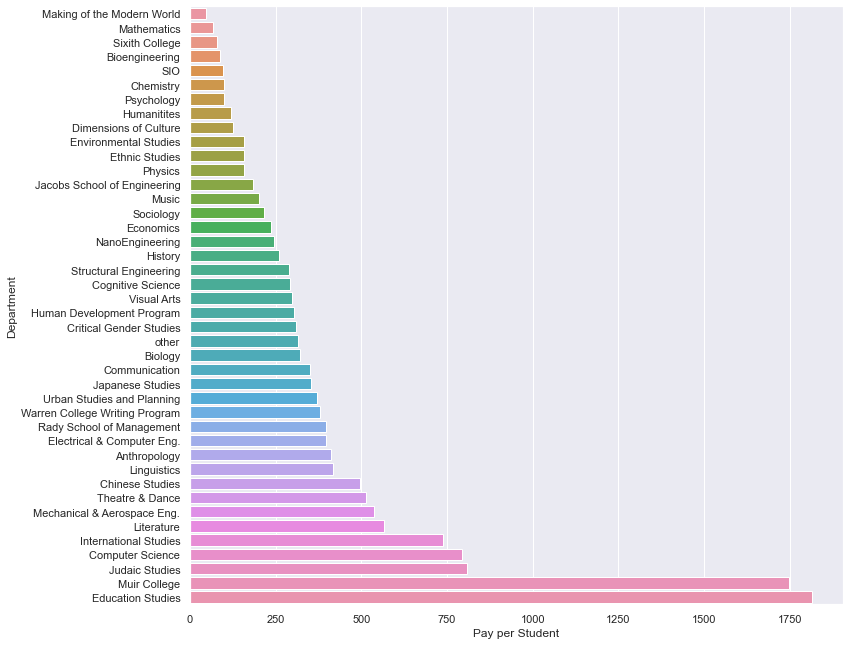

In [15]:
sns.set(rc={'figure.figsize':(11.7,11)})
sns.barplot(y=by_dep.index, x=by_dep['Pay per Student'], order=by_dep.sort_values('Pay per Student').index)

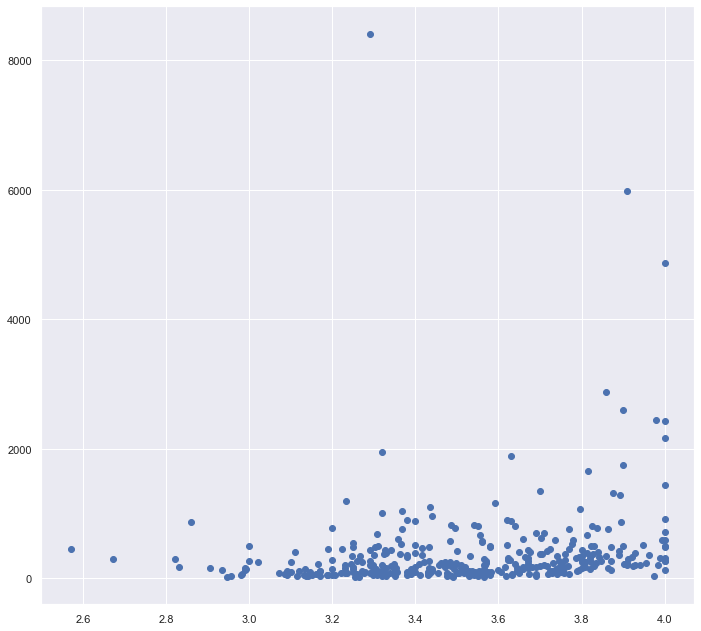

In [16]:
plt.scatter(df['Average Grade Expected'],df['Pay per Student'])

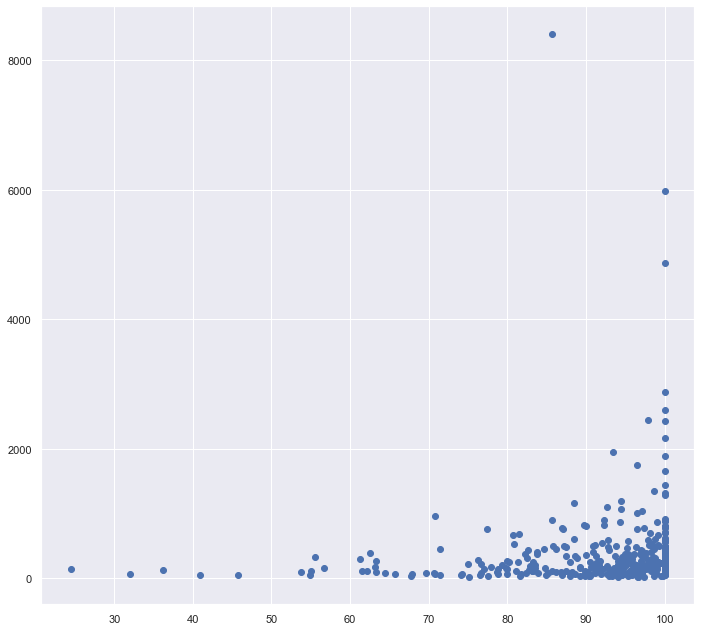

In [17]:
plt.scatter(df['Rcmnd Instr'],df['Pay per Student'])

In [18]:
h_Instr = df['Rcmnd Instr'].values
h_Pay = df['Pay per Student'].values
st_Instr, p_Instr = stats.normaltest(h_Instr)
st_Pay, p_Pay = stats.normaltest(h_Pay)

In [19]:
print(st_Instr)
print(p_Instr)

195.47620242489884
3.571757552585582e-43


In [20]:
print(st_Pay)
print(p_Pay)

495.62719550440727
2.3764131977396376e-108


In [21]:
# our significance value: 0.01
# < .01 means it is not normally distributed, we reject the null hypothesis

In [22]:
h_Grade = df['Average Grade Expected'].values
h_Pay = df['Pay per Student'].values
st_Grade, p_Grade = stats.normaltest(h_Grade)
st_Pay, p_Pay = stats.normaltest(h_Pay)

In [23]:
print(st_Grade)
print(p_Grade)

7.246867652445151
0.026690867154654685


In [24]:
# Grade is >.01 , normally distributed

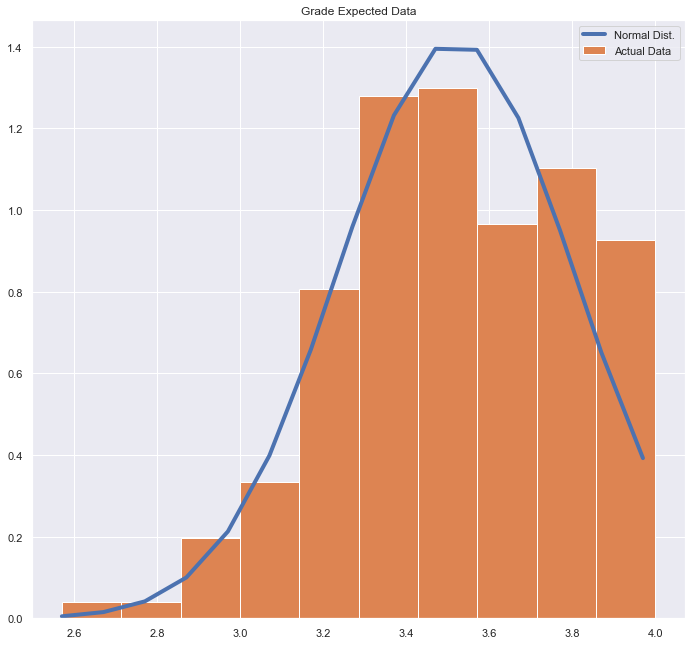

In [25]:
xs = np.arange(h_Grade.min(), h_Grade.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_Grade), np.std(h_Grade))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(h_Grade, density = True, label = 'Actual Data');
plt.title('Grade Expected Data')
plt.legend();

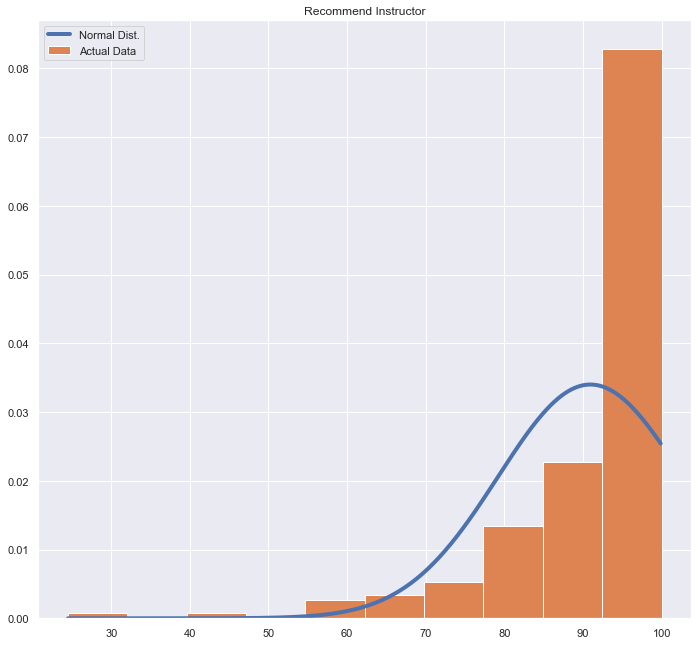

In [26]:
xs = np.arange(h_Instr.min(), h_Instr.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_Instr), np.std(h_Instr))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(h_Instr, density = True, label = 'Actual Data');
plt.title('Recommend Instructor')
plt.legend();

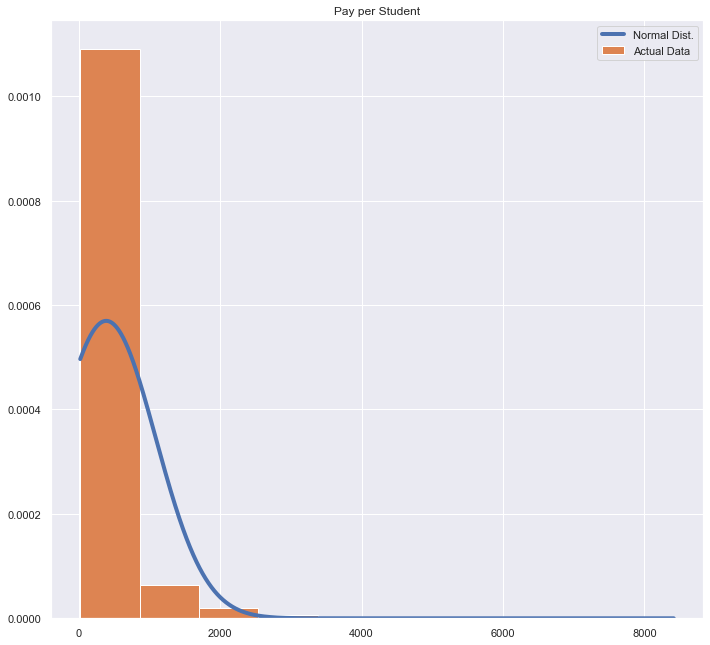

In [27]:
xs = np.arange(h_Pay.min(), h_Pay.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_Pay), np.std(h_Pay))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(h_Pay, density = True, label = 'Actual Data');
plt.title('Pay per Student')
plt.legend();

In [28]:
lower, upper = np.percentile(df['Pay per Student'], [25, 75])

In [29]:
print(lower)
print(upper)

101.13364229316855
421.69047619047615


In [30]:
iqr = upper - lower

In [31]:
iqr

320.55683389730757

In [32]:
lower_cutoff = lower - 1.5 * iqr
upper_cutoff = upper + 1.5 * iqr
lower_cutoff, upper_cutoff

(-379.7016085527928, 902.5257270364375)

In [33]:
df['Pay per Student log10'] = df['Pay per Student'].apply(np.log10)

In [34]:

h_logPay = df['Pay per Student log10'].values

st_logPay, p_logPay = stats.normaltest(h_logPay)

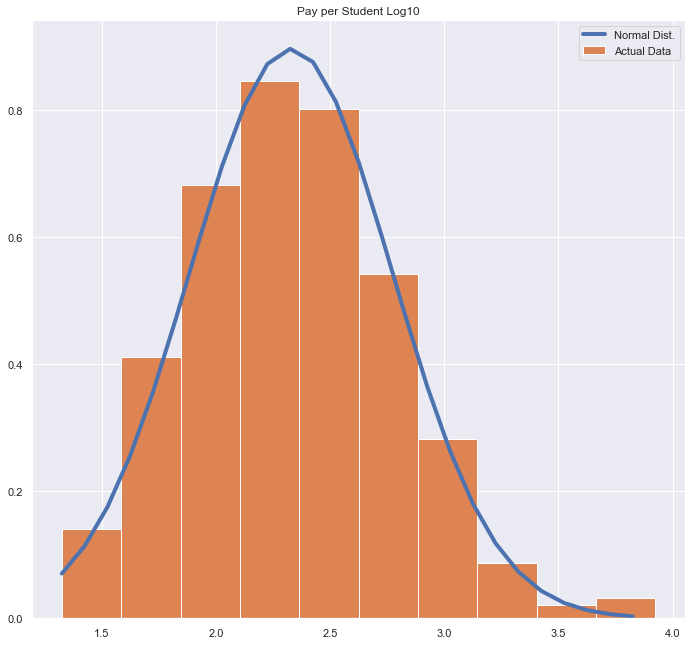

In [35]:
xs = np.arange(h_logPay.min(), h_logPay.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_logPay), np.std(h_logPay))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(h_logPay, density = True, label = 'Actual Data');
plt.title('Pay per Student Log10')
plt.legend();

In [36]:
# transform to a more normal distribution
# interpretation differs, relative change

In [37]:
df['Recommend Instr log10'] = df['Rcmnd Instr'].apply(np.log10)
h_logInstr = df['Recommend Instr log10'].values

st_logInstr, p_logInstr = stats.normaltest(h_logInstr)

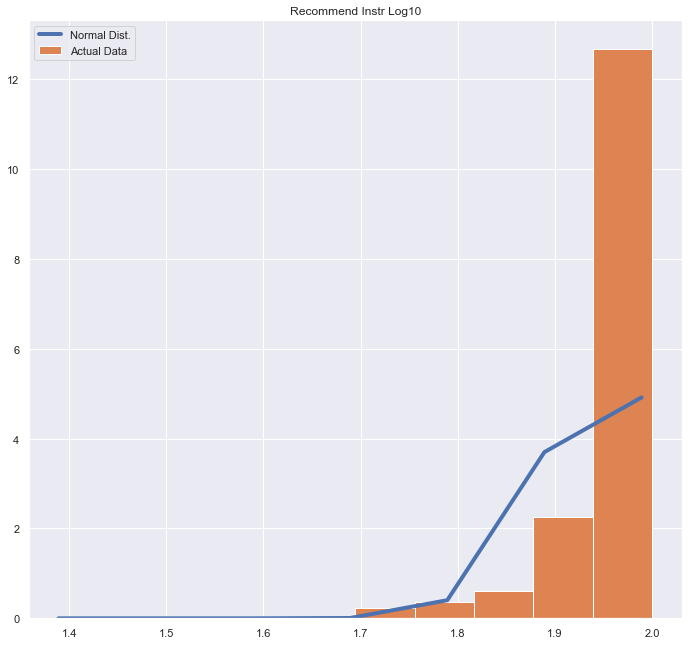

In [38]:
xs = np.arange(h_logInstr.min(), h_logInstr.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_logInstr), np.std(h_logInstr))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(h_logInstr, density = True, label = 'Actual Data');
plt.title('Recommend Instr Log10')
plt.legend();

In [39]:
lower, upper = np.percentile(df['Rcmnd Instr'], [25, 75])
print(lower)
print(upper)

87.95416666666668
98.78


In [40]:
iqr = upper - lower

In [41]:
iqr

10.825833333333321

In [42]:
lower_cutoff = lower - 1.5 * iqr
upper_cutoff = upper + 1.5 * iqr
lower_cutoff, upper_cutoff

(71.7154166666667, 115.01874999999998)

In [45]:
df_clean = df[(df['Rcmnd Instr'] > lower_cutoff) & (df['Rcmnd Instr'] < upper_cutoff)]
df_clean

,Title,Gross Pay,Department,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled,Pay per Student,Pay per Student log10,Recommend Instr log10
0,LECTURER - ACADEMIC YEAR,55491.0,Electrical & Computer Eng.,95.120,3.80200,5.0,196.0,283.117347,2.451966,1.978272
1,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,8900.0,Psychology,97.000,3.25000,1.0,52.0,171.153846,2.233387,1.986772
2,LECTURER IN SUMMER SESSION,5600.0,Structural Engineering,100.000,3.33000,1.0,14.0,400.000000,2.602060,2.000000
3,LECTURER - ACADEMIC YEAR - CONTINUING,52200.0,Chemistry,90.575,3.11500,4.0,1356.0,38.495575,1.585411,1.957008
4,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,20767.0,Mathematics,90.450,3.35000,2.0,491.0,42.295316,1.626292,1.956409
...,...,...,...,...,...,...,...,...,...,...
350,LECTURER - ACADEMIC YEAR,55327.0,Warren College Writing Program,96.825,3.32375,8.0,146.0,378.952055,2.578584,1.985988
351,ASSOCIATE TEACHING PROFESSOR - ACADEMIC YEAR,41667.0,Chemistry,77.900,2.83000,1.0,228.0,182.750000,2.261857,1.891537
352,LECTURER - ACADEMIC YEAR,31440.0,Computer Science,82.800,3.39500,2.0,242.0,129.917355,2.113667,1.918030
353,LECTURER - ACADEMIC YEAR,31151.0,other,99.140,3.80000,5.0,121.0,257.446281,2.410687,1.996249


In [46]:
h_Instr_clean = df_clean['Rcmnd Instr'].values
st_Instr_clean, p_Instr_clean = stats.normaltest(h_Instr_clean)

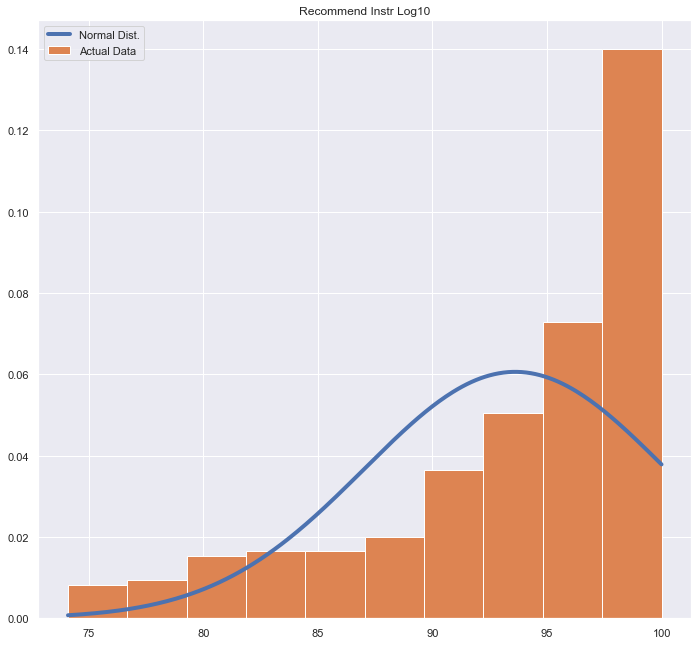

In [47]:
xs = np.arange(h_Instr_clean.min(), h_Instr_clean.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_Instr_clean), np.std(h_Instr_clean))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(h_Instr_clean, density = True, label = 'Actual Data');
plt.title('Recommend Instr Log10')
plt.legend();

In [49]:
df_clean['Recommend Instr log10'] = df_clean['Rcmnd Instr'].apply(np.log10)
h_logInstr_clean = df_clean['Recommend Instr log10'].values
st_logInstr_clean, p_logInstr_clean = stats.normaltest(h_logInstr_clean)

,Title,Gross Pay,Department,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled,Pay per Student,Pay per Student log10,Recommend Instr log10
0,LECTURER - ACADEMIC YEAR,55491.0,Electrical & Computer Eng.,95.120,3.80200,5.0,196.0,283.117347,2.451966,1.978272
1,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,8900.0,Psychology,97.000,3.25000,1.0,52.0,171.153846,2.233387,1.986772
2,LECTURER IN SUMMER SESSION,5600.0,Structural Engineering,100.000,3.33000,1.0,14.0,400.000000,2.602060,2.000000
3,LECTURER - ACADEMIC YEAR - CONTINUING,52200.0,Chemistry,90.575,3.11500,4.0,1356.0,38.495575,1.585411,1.957008
4,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,20767.0,Mathematics,90.450,3.35000,2.0,491.0,42.295316,1.626292,1.956409
...,...,...,...,...,...,...,...,...,...,...
350,LECTURER - ACADEMIC YEAR,55327.0,Warren College Writing Program,96.825,3.32375,8.0,146.0,378.952055,2.578584,1.985988
351,ASSOCIATE TEACHING PROFESSOR - ACADEMIC YEAR,41667.0,Chemistry,77.900,2.83000,1.0,228.0,182.750000,2.261857,1.891537
352,LECTURER - ACADEMIC YEAR,31440.0,Computer Science,82.800,3.39500,2.0,242.0,129.917355,2.113667,1.918030
353,LECTURER - ACADEMIC YEAR,31151.0,other,99.140,3.80000,5.0,121.0,257.446281,2.410687,1.996249


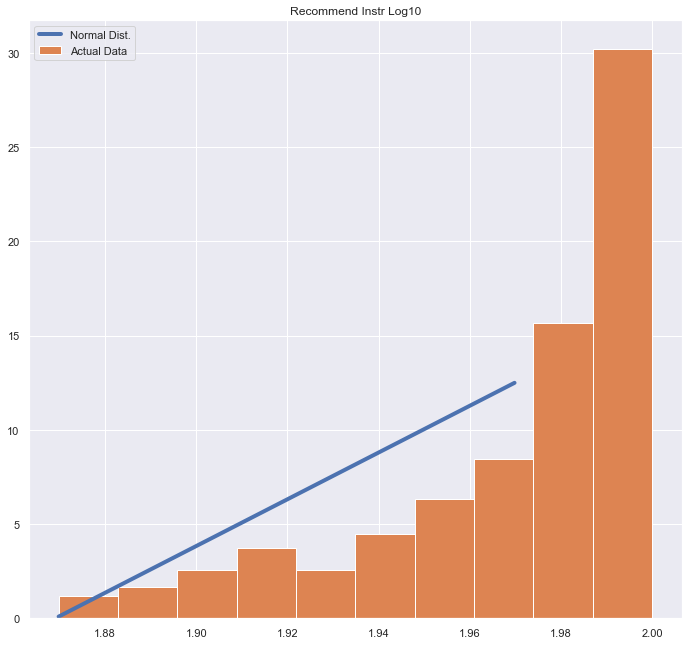

In [50]:
xs = np.arange(h_logInstr_clean.min(), h_logInstr_clean.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_logInstr_clean), np.std(h_logInstr_clean))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(h_logInstr_clean, density = True, label = 'Actual Data');
plt.title('Recommend Instr Log10')
plt.legend();

In [53]:
t_val, p_val = ttest_ind(h_Instr, h_logPay)

In [54]:
print(t_val)
print(p_val)

142.00980759051328
0.0


In [56]:
df_Instr = df[['Rcmnd Instr', 'Pay per Student']]

In [57]:
df_Instr.head()

,Rcmnd Instr,Pay per Student
0,95.120,283.117347
1,97.000,171.153846
2,100.000,400.000000
3,90.575,38.495575
4,90.450,42.295316


In [59]:
df_Instr.corr()

,Rcmnd Instr,Pay per Student
Rcmnd Instr,1.000000,0.138683
Pay per Student,0.138683,1.000000


In [68]:
df_Instr.columns = ['Instr', 'Pay']
outcome, predictors = patsy.dmatrices('Pay ~ Instr', df_Instr)

In [69]:
mod = sm.OLS(outcome, predictors)

In [70]:
res = mod.fit()

In [71]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pay   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     6.922
Date:                Mon, 08 Jun 2020   Prob (F-statistic):            0.00889
Time:                        13:24:53   Log-Likelihood:                -2826.0
No. Observations:                 355   AIC:                             5656.
Df Residuals:                     353   BIC:                             5664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -364.2474    288.483     -1.263      0.2

In [ ]:
# R-square = .019

In [74]:
t_val, p_val = ttest_ind(h_Grade, h_logPay)

In [75]:
t_val, p_val

(42.49676419212723, 5.399487704079363e-197)